In [59]:
import numpy as np

class AdalineGD(object):
    """
    [Parameter]
    eta : float 学習率
    n_iter : int トレーニング回数
    random_state : 重み初期化の乱数シード
    
    [data]
    w_ : array(1)  重み
    errors_ : list 各エポックの誤分類の数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        [Parameter]
        X : DataFrame サンプルデータ shape[0]=column(a number of samples), shape[1]=raw(a number of features) 
        y : array 目的変数データ
        
        [return]
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            
            net_input = self.net_input(X) # wX=推測値のベクトル
            output = self.activation(net_input) # ADALINEでは恒等変換(output = net_input)
            errors = (y-output)
            
            self.w_[1:] += self.eta * X.T.dot(errors) #XとΔyの内積
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum()/2.0
            
            self.cost_.append(cost)
            print("{0},{1}".format(X.T.dot(errors)[0], X.T.dot(errors)[1]))
            
        print(" ")
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0] # w0+w1*x1+w2*x2+...
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0.0, 1, -1)
    

In [56]:
import pandas as pd

df = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch02/iris.data', header=None)
#  df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                   'machine-learning-databases/iris/iris.data', header=None)

#df.tail()

# df.shape[1]

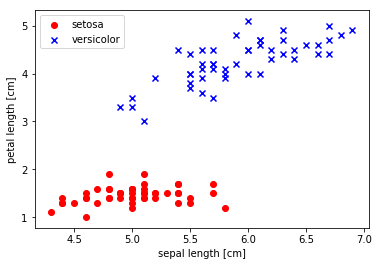

In [57]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[51:100,0], X[51:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

64.8385647262682,150.61083340991553
20.2813143295171,124.41579216951925
-6.028365731639086,108.44626267736902
-21.482954565436316,98.56514270238645
-30.480957182203806,92.31080740635366
-35.63946247594143,88.21854251844378
-38.51561594854428,85.41679666093228
-40.03589641103252,83.38695123495553
-40.75153587566204,81.82038335275429
-40.99049454223902,80.5334181910618
-40.94788600339649,79.41672558489716
-40.739780293223404,78.40521096514314
-40.435216730726964,77.46010044304197
-40.075251578166565,76.55828141948811
-39.68429140648004,75.6859602359901
-39.27683645182823,74.83488846807444
-38.861492914127346,74.00011756254176
-38.44336027445395,73.17866284028797
-38.02545174773193,72.36870857223838
-37.60953945036031,71.56913499416294
-37.19665727291451,70.77923687537285
-36.78740008718715,69.99855606214533
-36.38210177206817,69.22678183623245
-35.98094113658783,68.46369162343747
-35.584004941755644,67.70911571055798
-35.1913253961843,66.96291624737157
-34.80290246362641,66.2249747482816

0.0003964920697454577,0.12305346882019763
0.0012507038044917707,0.12142319198802398
0.002095450932579901,0.11981089048223548
0.002930837710623635,0.1182163663024387
0.0037569672468700244,0.11663942362924806
0.004573941514334212,0.11507986880050525
0.0053818613619485145,0.11353751028681258
0.006180826528568328,0.11201215866889513
0.006970935653948018,0.11050362661367918
0.007752286291307309,0.10901172885156085
0.008524974919316142,0.1075362821537087
0.009289096954306242,0.10607710530975933
0.01004474676113154,0.10463401910514847
0.010792017665726572,0.10320684629966315
0.0115310019654431,0.101795411605057
0.01226179094107449,0.10039954166394094
0.012984474868661167,0.0990190650289029
0.013699143029008987,0.09765381214051128
0.014405883719838197,0.0963036153072756
0.01510478426613826,0.0949683086847477
0.015795931031056254,0.09364772825529122
0.01647940942670334,0.09234171180808626
0.017155303924038634,0.09105009891889271
0.0178236980635309,0.08977273093049831
0.018484674465891082,0.0885

1078.546497768939,604.1260225579582
-1105.8466526294646,-618.3295886109498
1133.1772360649366,634.631494017841
-1161.7895743254396,-649.6992233795976
1190.5690360260605,666.6892558030098
-1220.5683092416903,-682.6490624994019
1250.8621184863023,700.3770111826793
-1282.325969169205,-717.2599179440906
1314.2037529204677,735.7764900685577
-1347.212956519938,-753.6166040469982
1380.7486195058095,772.9736428348617
-1415.387328392156,-791.8081495488937
1450.6591889465528,812.0588450208745
-1487.0151795975225,-831.9280193668383
1524.106121020891,853.1271133521202
-1562.2710455526358,-874.0743466846177
1601.2686828521319,896.2783335506065
-1641.3383259895315,-918.350175984051
1682.3351879505879,941.6175004393622
-1724.4097304934594,-964.8637176574687
1767.5034571206277,989.2549708818896
-1811.6877469321425,-1013.7286148647918
1856.981302378095,1039.3067301332587
-1903.3851338989723,-1065.0642233239641
1950.9870350771582,1091.8946722165897
-1999.7254383532675,-1118.9959047509558
2049.7499995026

-6293112562.915459,-3521726269.876728
6450421481.58149,3609758852.337494
-6611662650.621567,-3699991985.1189365
6776934365.009896,3792480675.204749
-6946337375.756615,-3887281304.922018
7119974953.387546,3984451665.6528587
-7297952948.838973,-4084050993.724162
7480379860.045036,4186140005.859495
-7667366896.020515,-4290780936.8517346
7859028046.713253,4398037576.843293
-8055480150.436253,-4507975310.871924
8256842967.150457,4620661158.071793
-8463239249.415657,-4736163813.18729
8674794819.277319,4854553687.792162
-8891638642.914337,-4975902953.870972
9113902911.312424,5100285587.158411
-9341723118.795776,-5227777412.893091
9575238147.678787,5358456151.384358
-9814590350.878113,-5492401466.048389
10059925640.744154,5629695011.315216
-10311393575.960041,-5770420483.062692
10569147454.764507,5914663668.982181
-10833344406.354717,-6062512501.531769
11104145488.722878,6214057110.885057
-11381715784.790844,-6369389880.531171
11666224505.09408,6528605502.937374
-11957845088.887465,-6691801037

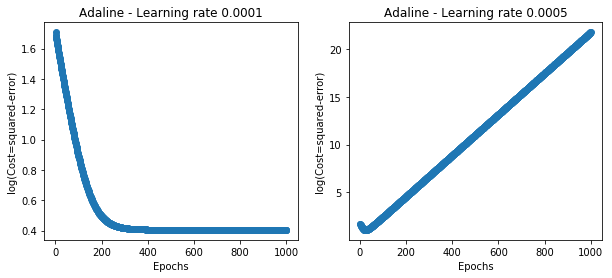

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

N=1000
l_rate1 =0.0001
l_rate2 =0.0005

adaline1 = AdalineGD(n_iter=N, eta=l_rate1).fit(X,y)

ax[0].plot(range(1,len(adaline1.cost_)+1), np.log10(adaline1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Cost=squared-error)')

ax[0].set_title('Adaline - Learning rate {0}'.format(l_rate1))


adaline2 = AdalineGD(n_iter=N, eta=l_rate2).fit(X,y)

ax[1].plot(range(1,len(adaline2.cost_)+1), np.log10(adaline2.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Cost=squared-error)')

ax[1].set_title('Adaline - Learning rate {0}'.format(l_rate2))

plt.show()

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
    

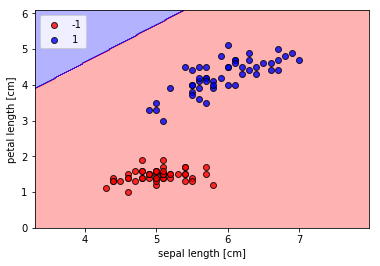

In [43]:
plot_decision_regions(X, y, classifier=adaline2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()